In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

In [4]:
def plot_heatmap(results: np.ndarray, training_days: list[list[tuple[int, int]]], title="Daily Heatmap", 
                 xticklabels: list[str]=None, yticklabels: list[str]=None,
                 decimal_places: int = 2, use_e_notation: bool = False,
                 save_path:str = None, force_show: bool = False):
    assert results.ndim == 2
    assert results.shape[0] == len(training_days)
    
    results = np.array(results)
    num_rows, num_cols = results.shape
    plt.figure(figsize=(num_cols*1.5, num_rows*1.5))
    cmap = sns.light_palette("blue", as_cmap=True)
    
    fmt = f".{decimal_places}{'e' if use_e_notation else 'f'}"
    
    ax = sns.heatmap(results, annot=True, fmt=fmt, cmap=cmap, cbar=True, linewidths=0.5, linecolor='black', 
                     xticklabels=[f'Day {i+1}' for i in range(num_cols)] if xticklabels is None else xticklabels, 
                     yticklabels=[f'Results {i+1}' for i in range(num_rows)] if yticklabels is None else yticklabels)
    
    for row, train_days in enumerate(training_days):
        for start, end in train_days:
            ax.add_patch(plt.Rectangle((start, row), end - start + 1, 1, fill=False, edgecolor='red', lw=3))
    
    plt.title(title)
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        if force_show:
            plt.show()
    else:
        plt.show()
    plt.close()

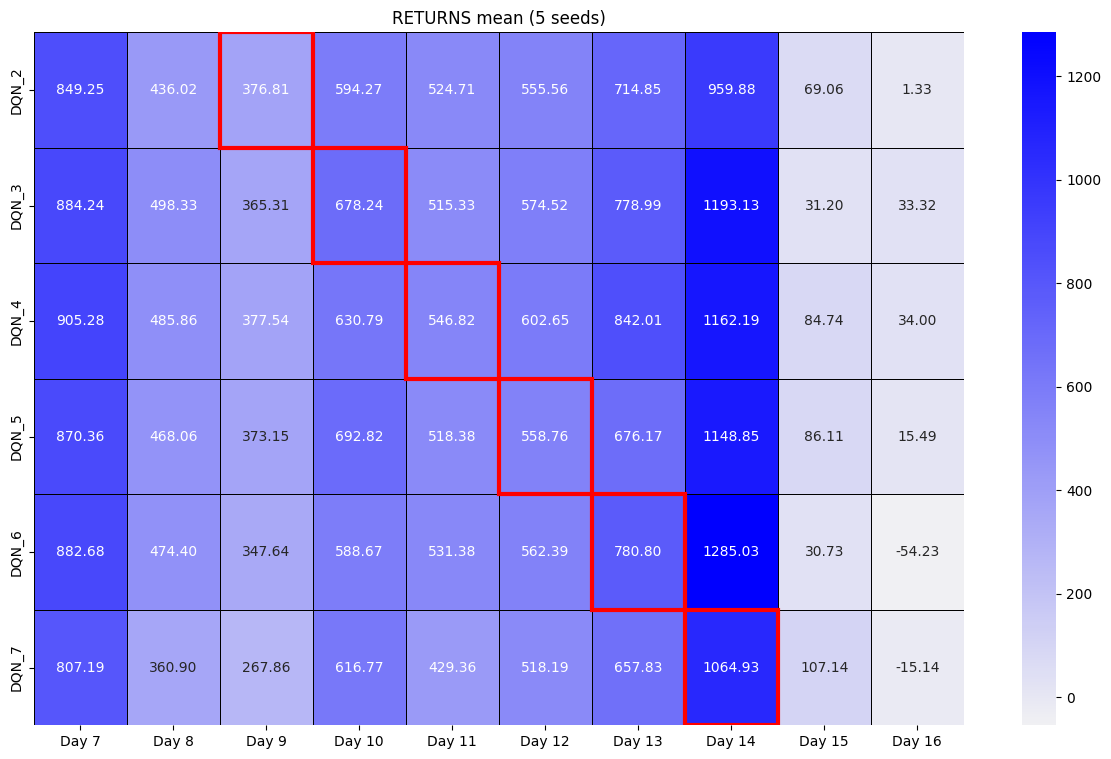

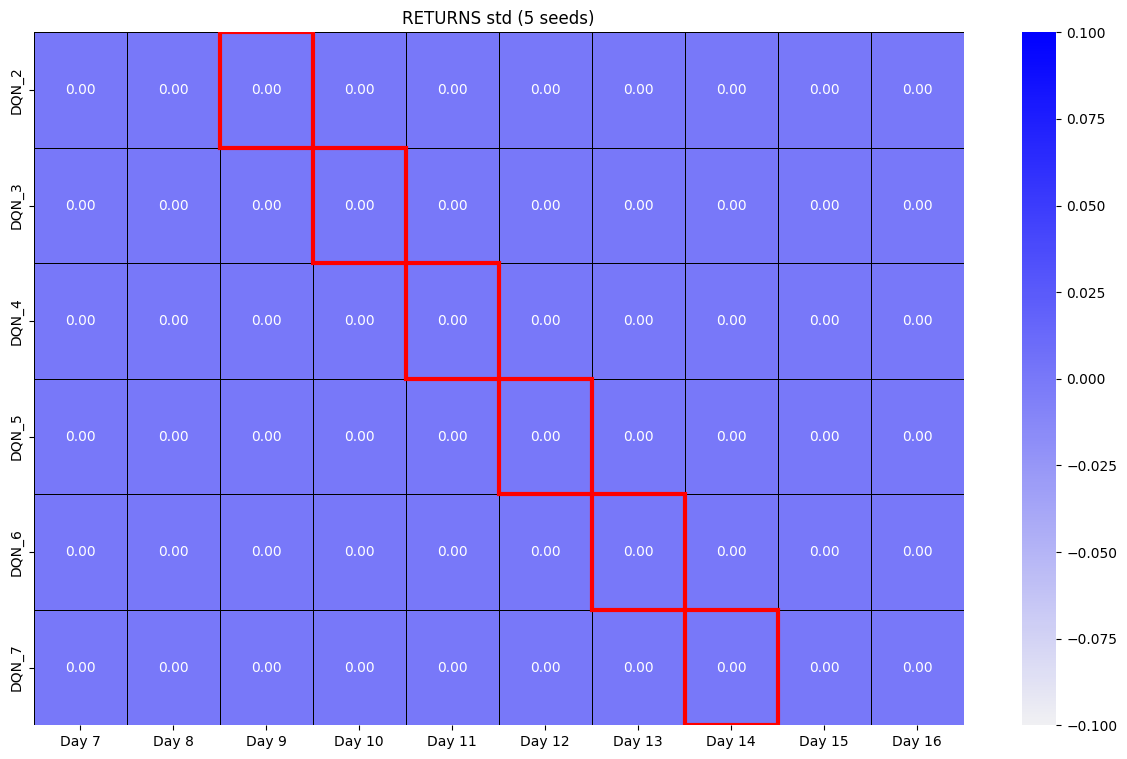

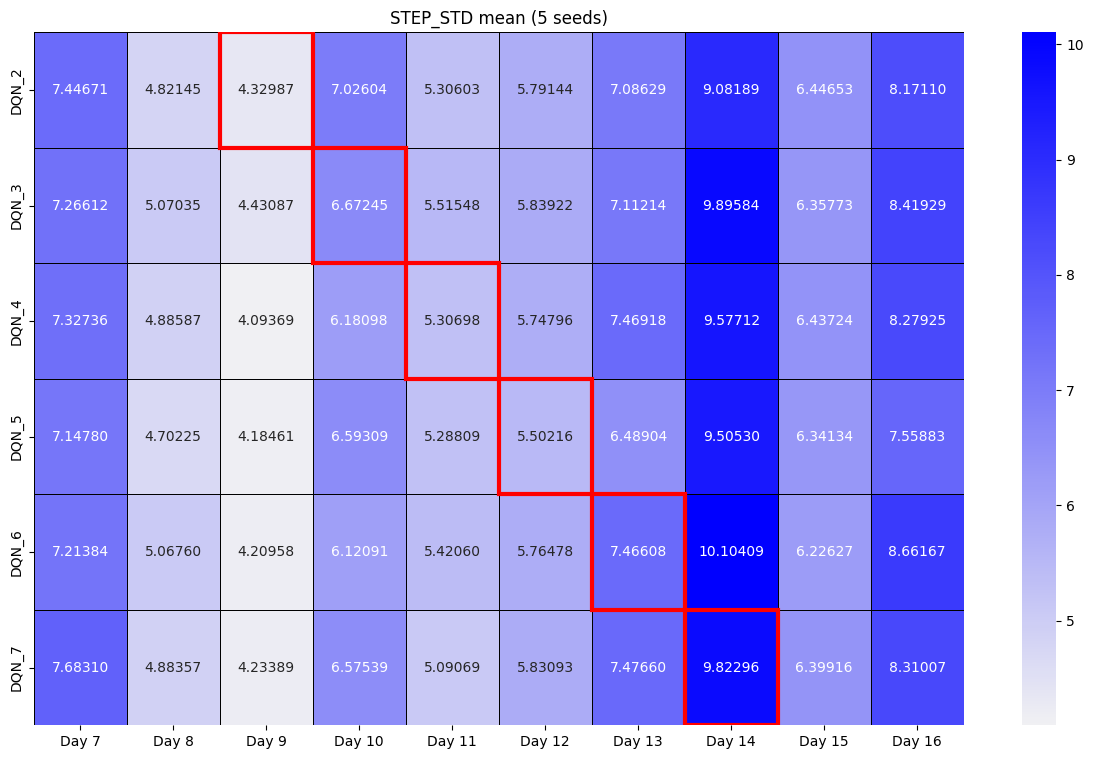

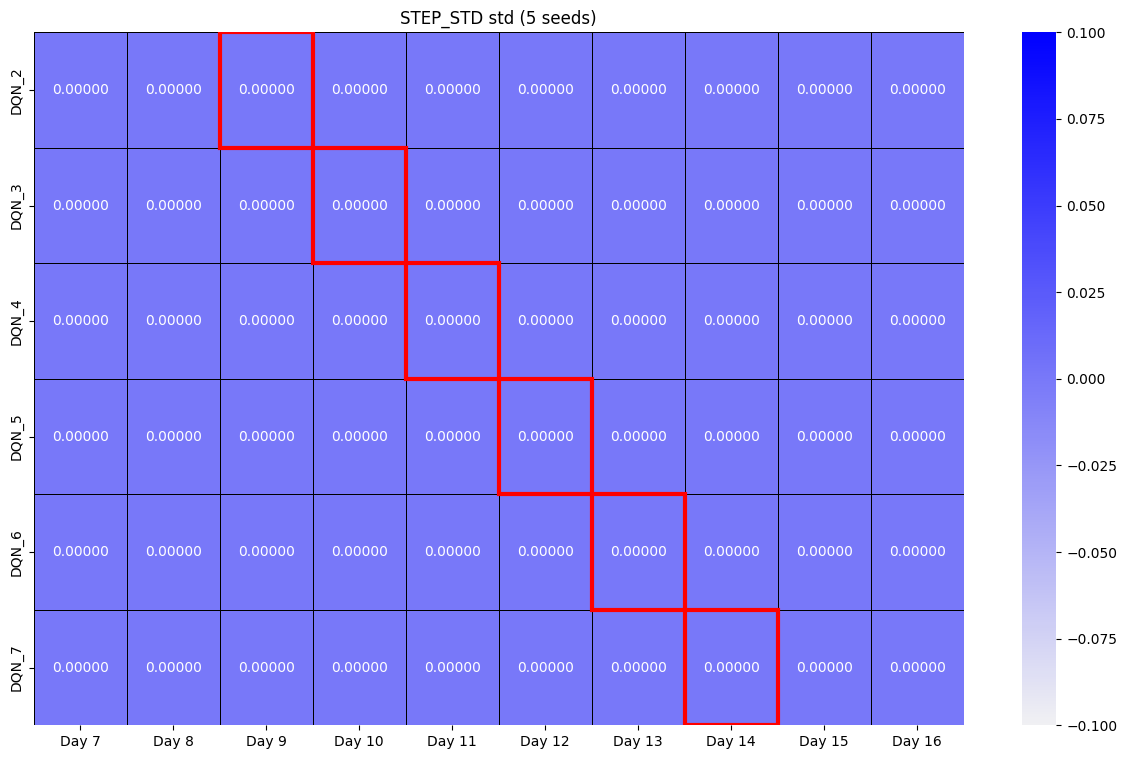

In [10]:
from pathlib import Path

# from train_online_rl import plot_heatmap
# from config import EXP_DIR
EXP_DIR = Path("/Users/lorecampa/Desktop/Projects/ICAIF24-challenge/experiments")
first_day = 7
agents = sorted(['DQN'])
# agents = ['DQN']

windows = list(range(0, 8))

metrics = ["returns", "step_std"]

results_path  = EXP_DIR / "tuning" / "completed" / "results"

save_path = results_path / "plots" / "_".join(agents)
save_path.mkdir(parents=True, exist_ok=True)

for metric in metrics: 
    means = []
    stds = []
    yticklabels = []
    training_days = []
    
    decimal_places, use_e_notation = (2, False) if metric == "returns" else (5, False)
    for window in windows:
        for agent in agents:
            if not (results_path / f"{metric}_{agent}_window_{window+7}_{window+7}.pkl").exists():
                continue
            with open(results_path / f"{metric}_{agent}_window_{window+7}_{window+7}.pkl", 'rb') as f:
                tmp = pickle.load(f)

            mean, std = tmp['mean'], tmp['std']
            means.append(mean)
            stds.append(std)
            yticklabels.append(f"{agent}_{window}")
            training_days.append([(window, window)])

    means = np.array(means)
    stds = np.array(stds)
    xticklabels = [f'Day {i+first_day}' for i in range(means.shape[1])] 

    plot_heatmap(means, training_days=training_days, xticklabels=xticklabels, yticklabels=yticklabels, 
                decimal_places=decimal_places, use_e_notation=use_e_notation, title=f"{metric.upper()} mean (5 seeds)", 
                save_path=save_path / f'{metric}_mean.png' if save_path is not None else None, force_show=True)
    plot_heatmap(stds, training_days=training_days, xticklabels=xticklabels, yticklabels=yticklabels, 
                decimal_places=decimal_places, use_e_notation=use_e_notation, title=f"{metric.upper()} std (5 seeds)", 
                save_path=save_path / f'{metric}_std.png' if save_path is not None else None, force_show=True)